#### Discrete Simulation HW1
#### Problem 1
Authored: Austin Jetrin Maddison 6481268

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from my_settings import *

In [38]:
DAYS_IN_YEAR = 365
get_ci  = lambda mean, var, n : (mean-1.96 * np.sqrt(var)/n, mean+1.96 * np.sqrt(var/n) )
np.random.seed(27)

In [39]:
def run_sim(n: int, N: int) -> tuple[float, tuple[float, float]]: 
    
    bd_lst = np.random.randint(0, 365, size=(N, n))
    
    success_occurred = np.apply_along_axis(lambda x: np.unique(x).shape[0] < n, axis=1, arr=bd_lst)
  
    success_mean = np.mean(success_occurred)
    success_var = np.var(success_occurred)
    
    ci = get_ci(success_mean, success_var, N)
    return (success_mean, ci)

Setting N

In [40]:
N = 400_000

a.)

In [41]:
n = 10
p_n ,ci = run_sim(n, N)
print(f"p_{n} = {p_n:<10.5f}")
print(f"CI  = {ci}")

p_10 = 0.11644   
CI  = (0.11643842831610976, 0.11743402017099534)


b.)

In [42]:
n = 20
p_n ,ci = run_sim(n, N)
print(f"p_{n} = {p_n:<10.5f}")
print(f"CI  = {ci}")    

p_20 = 0.40944   
CI  = (0.40944009051828517, 0.41096639003987057)


c.)

In [43]:
n = 30
p_n ,ci = run_sim(n, N)
print(f"p_{n} = {p_n:<10.5f}")
print(f"CI  = {ci}")

p_30 = 0.70632   
CI  = (0.7063152683036785, 0.7077289486843725)


d.)

In [89]:
ns = np.linspace(0, 50, 51, dtype=int)
ps = np.zeros((51))

for n in ns:
    p_n ,ci = run_sim(n, N)   
    ps[n] = p_n

Find intersection of p(n) = ps and p(n) = 0.5

In [90]:
xs = ns

In [91]:
n = np.argmin(np.abs((np.ones((51, 1)) * 0.5) - ps))

In [92]:
intersection  = (n, ps[n].item())
print(f'p_{intersection[0]} = {intersection[1]}')

p_23 = 0.506275


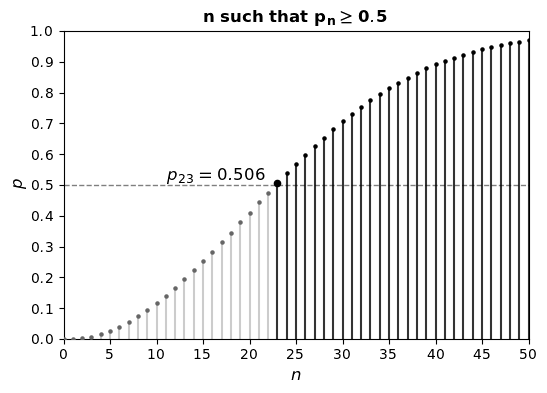

In [93]:
plt.figure(figsize=(6, 4))
# plt.grid(zorder=0)

plt.axhline(0.5, alpha=0.5, color="k", linestyle="--", linewidth=1)

mask = ps < 0.5
        
plt.scatter(xs[mask], ps[mask], s=5, color=(0.4, 0.4, 0.4), marker='o', zorder=4)
plt.scatter(xs[~mask], ps[~mask], s=5, color="k", marker='o', zorder=4)
plt.vlines(xs, ymax = (mask) * ps, ymin=np.zeros(mask.size), color='k', alpha = 0.2)
plt.vlines(xs, ymax = (~mask) * ps, ymin=np.zeros((~mask).size), color='k', alpha = 0.8)

plt.scatter(intersection[0], intersection[1], s=20, color='k', marker='o')

plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0] -12, intersection[1]+ 0.01), fontsize=12)
plt.xticks(np.arange(0, 51, 5, dtype=int))
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.title("$\\mathbf{ \\textbf{n such that }p_{n} \ge 0.5}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("tex/p1_d.svg")

In [ ]:
N= 400_000
n = 23  
p_n ,ci = run_sim(n, N)
print(p_n, ci)


In [94]:
def prod_func(n):
    product = 1
    for i in range(n):
        product *= (DAYS_IN_YEAR - i) / 365 
    return 1 - product

In [95]:
ns = np.linspace(0, 50, 51, dtype=int)
ys = np.zeros((51))

for n in ns:
    p_n = prod_func(n)   
    ys[n] = p_n

p_23 = 0.5072972343239857


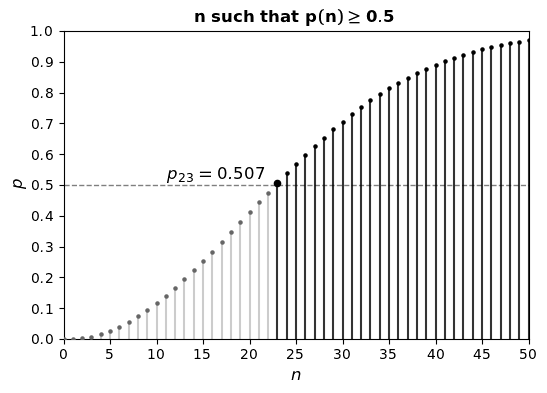

In [100]:
n = np.argmin(np.abs((np.ones((51, 1)) * 0.5) - ys))
intersection = (n, ys[n].item())
print(f'p_{intersection[0]} = {intersection[1]}')
plt.figure(figsize=(6, 4))

plt.axhline(0.5, alpha=0.5, color="k", linestyle="--", linewidth=1)

mask = ys < 0.5

plt.scatter(xs[mask], ys[mask], s=5, color=(0.4, 0.4, 0.4), marker='o', zorder=4)
plt.scatter(xs[~mask], ys[~mask], s=5, color="k", marker='o', zorder=4)
plt.vlines(xs, ymax=(mask) * ys, ymin=np.zeros(mask.size), color='k', alpha=0.2)
plt.vlines(xs, ymax=(~mask) * ys, ymin=np.zeros((~mask).size), color='k', alpha=0.8)

plt.scatter(intersection[0], intersection[1], s=20, color='k', marker='o')

plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $", (intersection[0] - 12, intersection[1] + 0.01), fontsize=12)
plt.xticks(np.arange(0, 51, 5, dtype=int))
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.title("$\\mathbf{ \\textbf{n such that }p(n) \ge 0.5}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("tex/p1_e.svg")

In [98]:
np.sum((ps - ys)**2)/50

2.0132555844434416e-07